In [1]:
!pip install -q  kaggle
! gdown --id 1Kr1QJBppA2sGA5hw5jvSpKlen9Yt3tEl

Downloading...
From: https://drive.google.com/uc?id=1Kr1QJBppA2sGA5hw5jvSpKlen9Yt3tEl
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 60.5kB/s]


In [2]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d akash14/house-price-dataset
!unzip house-price-dataset.zip

  0% 0.00/2.13M [00:00<?, ?B/s]
100% 2.13M/2.13M [00:00<00:00, 71.1MB/s]
Archive:  house-price-dataset.zip
  inflating: Participants_Data_HPP/Test.csv  
  inflating: Participants_Data_HPP/Train.csv  
  inflating: Participants_Data_HPP/sample_submission.csv  


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import folium
print('import successful')

import successful


In [9]:
df = pd.read_csv('/content/Participants_Data_HPP/Train.csv')
df_test = pd.read_csv('/content/Participants_Data_HPP/Test.csv')
print('The shape of dataset is {}'.format(df.shape))
df.head()

The shape of dataset is (29451, 12)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [11]:
df = df[(df['TARGET(PRICE_IN_LACS)']<15000) & 
        (df['SQUARE_FT']<300000) & (df['BHK_NO.']<=6)]

print('Shape of the dataset after neglecting the outliers {}'.format(df.shape))

Shape of the dataset after neglecting the outliers (29401, 12)


In [12]:
df['city'] = df['ADDRESS'].apply(lambda x: x.split(',')[1])
df.drop('ADDRESS', axis=1, inplace=True)
top_cities = df['city'].value_counts()[:10].keys().tolist()


df_test['city'] = df_test['ADDRESS'].apply(lambda x: x.split(',')[1])
df_test.drop('ADDRESS', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


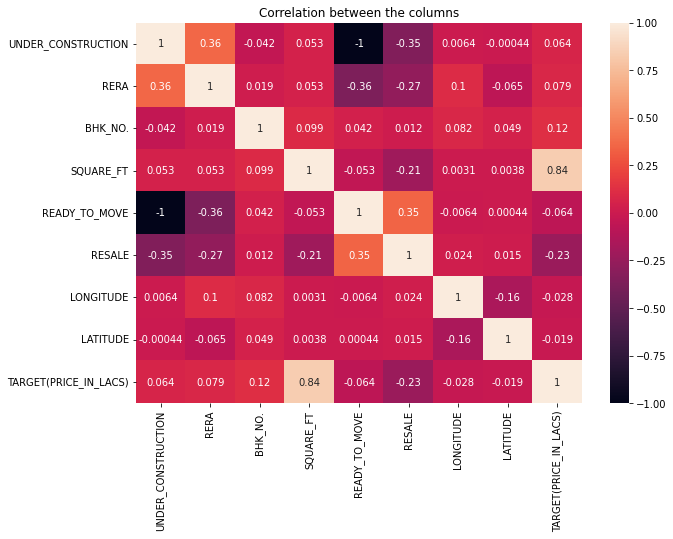

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


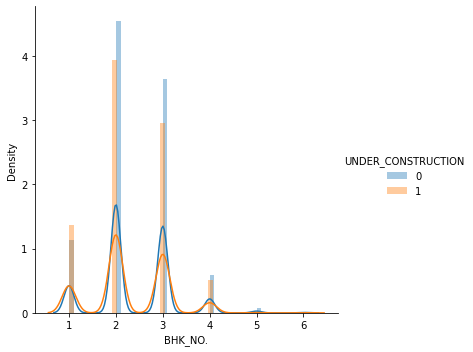

In [15]:
sns.FacetGrid(df,hue='UNDER_CONSTRUCTION',size=5).map(sns.distplot,'BHK_NO.').add_legend()

In [16]:
cost_per_sq_ft = []
for city in (top_cities):
    a = df['SQUARE_FT'][df['city']==city].mean()
    b = df['TARGET(PRICE_IN_LACS)'][df['city']==city].mean()
    cost_per_sq_ft.append(int((b/a)*100000))
cost_per_sq_ft

[6918, 14966, 16966, 8163, 5777, 6107, 16026, 6115, 4321, 3896]

Text(0.5, 1.0, 'Cost per Square_ft in Top Cities of India')

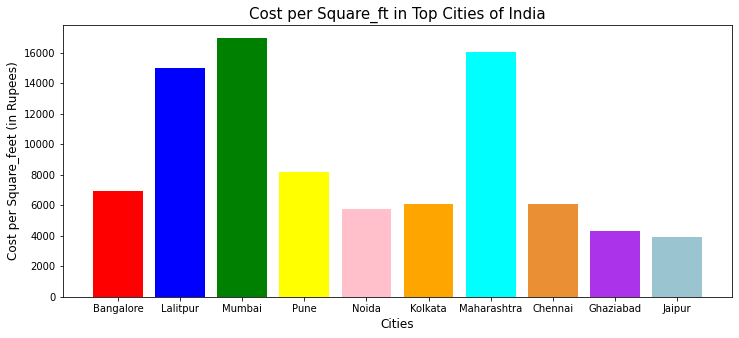

In [17]:
plt.figure(figsize=(12, 5))
plt.bar(top_cities, cost_per_sq_ft, color=['red', 'blue', 'green',
                                           'yellow', 'pink', 'orange',
                                           'cyan', '#eb8f34', '#ab34eb','#9bc4d1'])
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Cost per Square_feet (in Rupees)', fontsize=12)
plt.title('Cost per Square_ft in Top Cities of India', fontsize=15)

In [18]:
city_df = df[df['city'].isin(top_cities)]
city_df['city'].unique()

array(['Bangalore', 'Ghaziabad', 'Kolkata', 'Jaipur', 'Chennai', 'Noida',
       'Pune', 'Mumbai', 'Lalitpur', 'Maharashtra'], dtype=object)

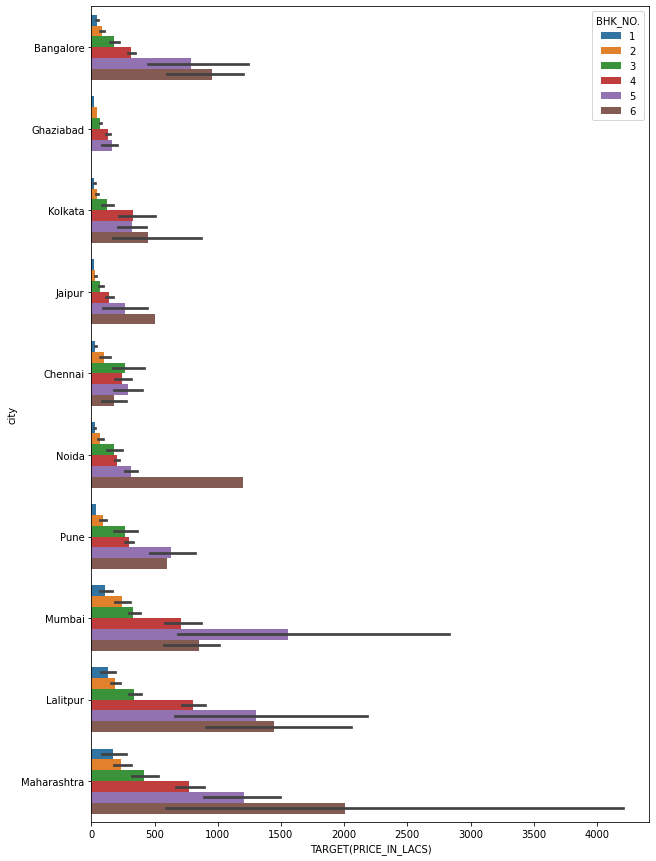

In [20]:
plt.figure(figsize=(10, 15))
sns.barplot(x='TARGET(PRICE_IN_LACS)', y='city', data=city_df, hue='BHK_NO.', estimator=np.mean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


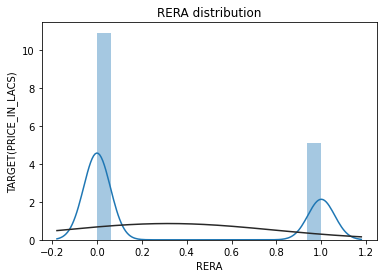

In [21]:
from scipy.stats import norm
# Distribution plot
def distribution_plot(data):
    sns.distplot(data, fit=norm)
    plt.ylabel('TARGET(PRICE_IN_LACS)')
    plt.title(f'{data.name} distribution')
    
distribution_plot(df['RERA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


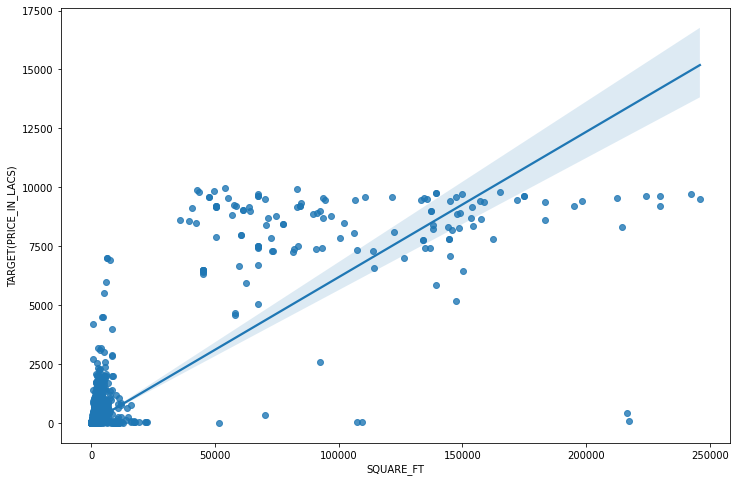

In [22]:
plt.figure(figsize=(12, 8))
sns.regplot('SQUARE_FT','TARGET(PRICE_IN_LACS)', data=df)

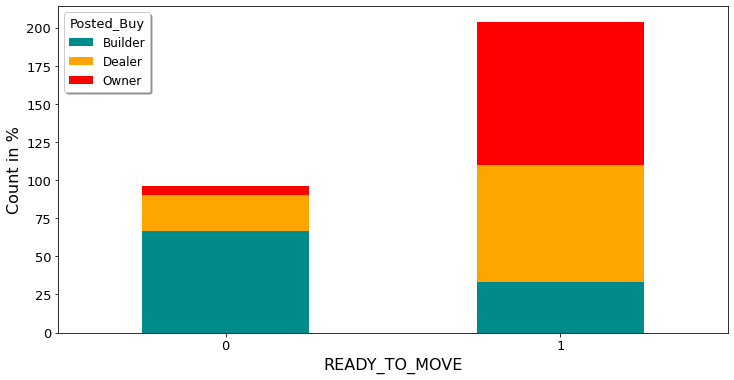

In [23]:
Resale = (df.groupby(['READY_TO_MOVE','POSTED_BY'])['TARGET(PRICE_IN_LACS)'].count()/df.groupby(['POSTED_BY'])['RESALE'].count()*100).unstack()

Resale.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['darkcyan', 'orange', "red"])
plt.xlabel('READY_TO_MOVE',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Posted_Buy', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()

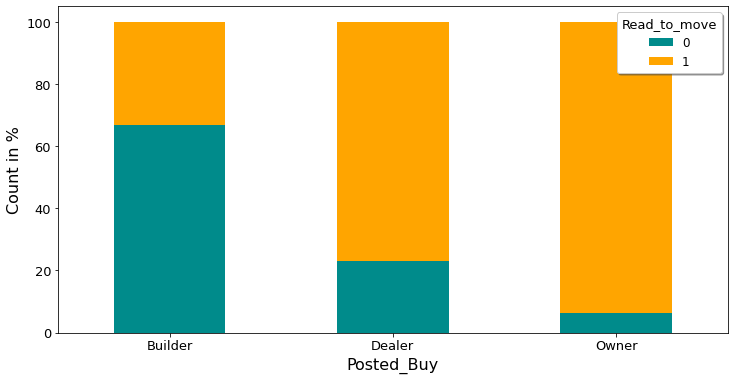

In [24]:
Posted_Buy = (df.groupby(['POSTED_BY','READY_TO_MOVE'])['TARGET(PRICE_IN_LACS)'].count()/df.groupby(['POSTED_BY'])['RESALE'].count()*100).unstack()

Posted_Buy.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['darkcyan', 'orange', "red"])
plt.xlabel('Posted_Buy',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'Read_to_move', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()


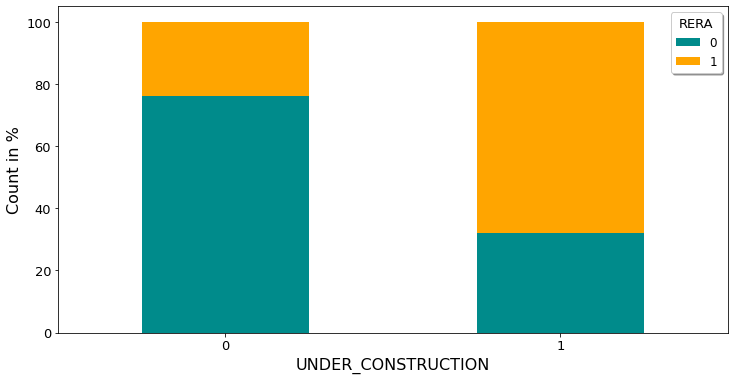

In [25]:
UNDER_CONSTRUCTION = (df.groupby(['UNDER_CONSTRUCTION','RERA'])['TARGET(PRICE_IN_LACS)'].count()/df.groupby(['UNDER_CONSTRUCTION'])['RERA'].count()*100).unstack()

UNDER_CONSTRUCTION.plot(kind = 'bar', figsize = (12, 6), stacked = True, color = ['darkcyan', 'orange', "red"])
plt.xlabel('UNDER_CONSTRUCTION',fontsize = 16)
plt.ylabel('Count in %',fontsize = 16)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(title = 'RERA', fontsize = 12, title_fontsize = 13, shadow = True)
plt.show()

print()

In [26]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

df['POSTED_BY'] = Le.fit_transform(df['POSTED_BY'])

df['BHK_OR_RK'] = Le.fit_transform(df['BHK_OR_RK'])

df['city'] = Le.fit_transform(df['city'])

In [27]:
df.head()
df_clean = df
df_clean

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,166
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,311
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,166
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,225
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,283
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,144
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,51
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,253
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,198


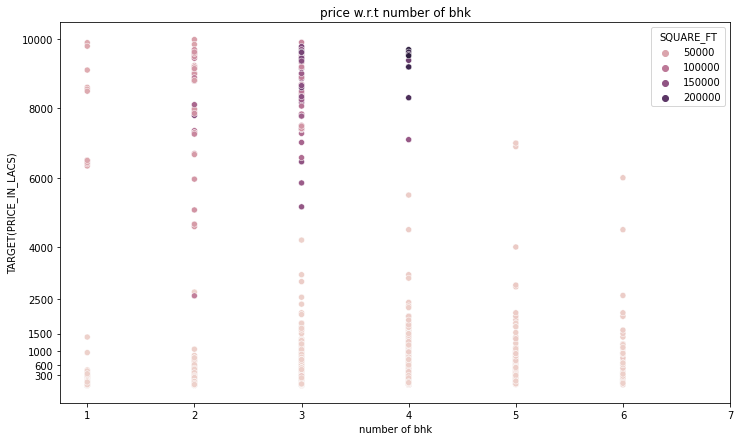

In [29]:
price_range = [300, 600, 1000,1500, 2500, 4000, 6000, 8000, 10000]
plt.figure(figsize=(12, 7))
sns.scatterplot(x='BHK_NO.', y='TARGET(PRICE_IN_LACS)', hue="SQUARE_FT", data=df)
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.yticks(price_range)
plt.title('price w.r.t number of bhk')
plt.xlabel('number of bhk')
plt.show()

In [30]:
df2 = pd.concat([df.drop(['city','POSTED_BY', 'BHK_OR_RK', 'LONGITUDE', 'LATITUDE'], axis=1),  
                pd.get_dummies(df['POSTED_BY'])], axis=1)
df2_test = pd.concat([df_test.drop(['city','POSTED_BY', 'BHK_OR_RK', 'LONGITUDE', 'LATITUDE'], axis=1), 
                pd.get_dummies(df_test['POSTED_BY'])], axis=1)
df2_test.reset_index(drop=True, inplace=True)

df2.reset_index(drop=True, inplace=True)
df2.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),0,1,2
0,0,0,2,1300.236407,1,1,55.0,0,0,1
1,0,0,2,1275.000000,1,1,51.0,0,1,0
2,0,0,2,933.159722,1,1,43.0,0,0,1
3,0,1,2,929.921143,1,1,62.5,0,0,1
4,1,0,2,999.009247,0,1,60.5,0,1,0


In [31]:
x = df2.drop('TARGET(PRICE_IN_LACS)', axis=1).values
y = df2['TARGET(PRICE_IN_LACS)'].values

 Splitting the dataset into the Training set and Test set

In [32]:
x_train, x_test,y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print('x_train and x_test shapes are {} and {}'.format(x_train.shape, x_test.shape))
print('y_train and y_test shapes are {} and {}'.format(y_train.shape, y_test.shape))

x_train and x_test shapes are (20580, 9) and (8821, 9)
y_train and y_test shapes are (20580,) and (8821,)


Fitting Linear regression

In [33]:
model1 = LinearRegression()
reg = model1.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
reg.score(x_train, y_train)

0.720573524533662

In [34]:
reg.score(x_test, y_test)

0.6984044162081694

In [35]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
yhat1 = model1.predict(x_test)
print('The mean absolute error for linear regression is {}'.format(metrics.mean_absolute_error(yhat1, y_test)))
print('The Residual sum of squares (MSE): {}'.format(np.mean((yhat1-y_test)**2)))
print('The R2-Score is {}'.format(metrics.r2_score(yhat1, y_test)))

The mean absolute error for linear regression is 80.84753639550019
The Residual sum of squares (MSE): 97191.08862673737
The R2-Score is 0.6952029516169737


# Fitting Decision Tree Regression 


In [36]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)

0.9935839120304172

In [37]:
dt.score(x_test, y_test)


0.8970173646443148

In [38]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)
yhat2 = model2.predict(x_test)
print('The mean_absolute error for Decision Tree Regressor is {}'.format(metrics.mean_absolute_error(yhat2, y_test)))
print('The Residual sum of squares (MSE): {}'.format(np.mean((yhat2-y_test)**2)))
print('The R2-Score is {}'.format(metrics.r2_score(yhat2, y_test)))

The mean_absolute error for Decision Tree Regressor is 59.9114897584948
The Residual sum of squares (MSE): 33186.807028241696
The R2-Score is 0.9059584081006834


In [39]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9834991007566415

In [40]:
rf.score(x_test,y_test)

0.9207424760460616

In [41]:
model3 = RandomForestRegressor(n_estimators=500, random_state=1)
model3.fit(x_train, y_train)
yhat3 = model3.predict(x_test)
print('The mean_absolute error for Random Forest Regressor is {}'.format(metrics.mean_absolute_error(yhat3, y_test)))
print('The Residual sum of squares (MSE): {}'.format(np.mean((yhat3-y_test)**2)))
print('The R2-Score is {}'.format(metrics.r2_score(yhat3, y_test)))

The mean_absolute error for Random Forest Regressor is 54.79732374420155
The Residual sum of squares (MSE): 25541.84548359671
The R2-Score is 0.9230573911652018


In [42]:
pred_test = model3.predict(df2_test.values)
print(pred_test[:20])
df2_test.head()

[ 77.78073333  79.87934429  49.3454      41.492       19.9546
  18.52359008  45.291       55.343       24.43        52.97286667
 192.96        95.997      102.242       53.243       45.854
 212.08088     60.1652      20.16723515  49.60268032  94.38785183]


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,Builder,Dealer,Owner
0,0,0,1,545.171340,1,1,0,0,1
1,1,1,2,800.000000,0,0,0,1,0
2,0,0,2,1257.096513,1,1,0,1,0
3,0,0,3,1400.329489,1,1,0,1,0
4,0,0,1,430.477830,1,1,0,0,1


In [43]:
output = pd.DataFrame({
    'TARGET(PRICE_IN_LACS)': pred_test
})

In [44]:
output.to_csv('indian_housing_price.csv', index=False)

In [45]:
df3 = pd.read_csv('./indian_housing_price.csv')
df3.head(20)

,TARGET(PRICE_IN_LACS)
0,77.780733
1,79.879344
2,49.345400
3,41.492000
4,19.954600
5,18.523590
6,45.291000
7,55.343000
8,24.430000
9,52.972867


Accuracy score:

In [46]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [47]:
accuracy_score(y_true, y_pred, normalize=False)

2

In [48]:
from sklearn.metrics import top_k_accuracy_score
y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])
top_k_accuracy_score(y_true, y_score, k=2)

0.75

Confusion matrix:

In [49]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

In [50]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5

